# Mapa de atributos, 3 classes Iris, caso 2D, gerar imagem PNG

In [3]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display

iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target

# normalização global - não deve ser usada
X_a = X - X.min()
X_a /= X_a.max()

# normalização correta - por coluna
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)

def softmax(Z):
    # computes softmax for all samples, normalize among classes (columns)
    # input Z: scores; shape: samples rows x classes columns
    # output S: same shape of input
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) # normaliza nas classes - colunas
    return S

def predict(X,WT):
    Y_hat_oh = softmax(X.dot(WT))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(Y_hat_oh, axis=1)
    return Y_hat

def oneHotIt(Y,n_classes):
    n_samples = Y.size # número de amostras
    i = np.arange(n_samples)
    Y_oh = np.zeros(shape=(n_samples,n_classes))
    Y_oh[i,Y] = 1
    return Y_oh


X_bias = np.hstack([np.ones((150,1)),X_c]) # incluído X com coluna de 1s para gerar bias no W
colors = np.array(['r','y','b'])

n_samples = X_bias.shape[0] # number of training examples
n_features = X_bias.shape[1] # number of attributes (features + 1(bias))
n_classes = 3          # number of classes
WT = np.zeros((n_features,n_classes)) # n. de linhas é igual a número de atributos (features, pixels)
iterations = 10000
learningRate = 0.15
Y_oh = oneHotIt(Y,3)

for i in range(iterations):
    scores = X_bias.dot(WT)
    Y_hat_oh = softmax(scores)
    loss = (-1. / n_samples) * np.sum(Y_oh * np.log(Y_hat_oh))
    Grad = (-1. / n_samples) * (X_bias.T).dot(Y_oh - Y_hat_oh) 
    WT = WT - (learningRate * Grad)

(10000,)


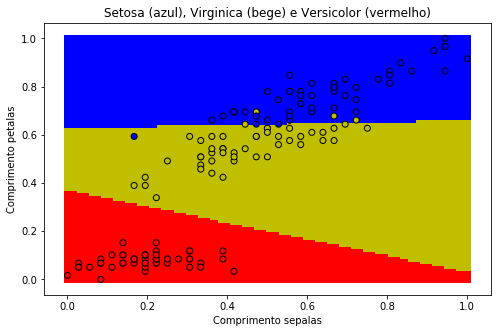

In [6]:
#criando a grid de features
xx0, xx1 = np.meshgrid(np.linspace(X_bias[:, 1].min(), X_bias[:, 1].max(),100), np.linspace(X_bias[:, 2].min(), X_bias[:, 2].max(),100))
x_grid = np.c_[xx0.ravel(), xx1.ravel()]
x_grid_bias = np.hstack([np.ones((x_grid.shape[0], 1)), x_grid])

#predição
y_grid = predict(x_grid_bias,WT)
print(y_grid.shape)

#plotando
plt.figure(figsize=(8,5))
#fundo
plt.scatter(x_grid_bias[:, 1], x_grid_bias[:, 2], c=colors[y_grid], marker='s')
#pontos do x_bias
plt.scatter(X_bias[:, 1], X_bias[:, 2], c=colors[Y], edgecolors='k')

plt.title('Setosa (azul), Virginica (bege) e Versicolor (vermelho)')
plt.ylabel('Comprimento petalas')
plt.xlabel('Comprimento sepalas')
plt.savefig('my_mapa_atributos.png')
plt.show()

In [5]:
print(y_grid.shape)

(10000,)
